# Urban canyon study

This example shows the behavior of sparrowpy in the simulation of an urban canyon under different simulation conditions

In [15]:
"""Test the radiosity.Radiosity module."""
import pyfar as pf
import sparrowpy as sp
from run_simu import run_simu, run_simu_mem, run_simu_pure
import json
import numpy as np
import matplotlib.pyplot as plt
import os

%load_ext memory_profiler

%matplotlib inline
# %matplotlib ipympls

basepath="out"

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Lets define our room and source position.

In [16]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, -1], [0, -1, 0]),
        ]

In [17]:
# Define parameters
X = 90
Y = 12
Z = 6

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(20, 6, 1)
receiver = pf.Coordinates(70, 6, 2)

In [18]:
run_simu(walls=urban_canyon_stub(1,1,1),
        source=pf.Coordinates(.5,.5,.5),
        receiver=pf.Coordinates(.5,.5,.5),
        patch_size=1)

d:\Users\ahe\sparrowpy\examples\run_simu.py:85: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\ita-sim\AppData\Local\miniforge3\envs\sparrowpy\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\ita-sim\AppData\Local\miniforge3\envs\sparrowpy\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
d:\Users\ahe\sparrowpy\examples\run_simu.py:102: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


(TimeData:
 (1, 1) channels with 5 samples,
 [0.0, 0.01562666893005371, 0.0, 0.0])

## diffuse vs custom

In [ ]:
order=30
dur=1.
step=.002
psize=6

In [20]:
filename_wall = "resources\\brdf_rand.sofa"
filename_ground = "resources\\brdf_ground.sofa"
etc_diff=run_simu_pure(
    walls=canyon,
    source=source,
    receiver=receiver,
    patch_size=psize,
    time_step=step,
    duration=dur,
    refl_order=order,
    file_wall=filename_wall,
    file_ground=filename_ground)



SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights


SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights


d:\Users\ahe\sparrowpy\examples\run_simu.py:158: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(
D:\Users\ahe\sparrowpy\sparrowpy\classes\RadiosityFast.py:1269: ComplexWarning: Casting complex values to real discards the imaginary part
  form_factors_tilde[i, j, :, :] = form_factors_tilde[


In [ ]:
filename_wall = "resources\\brdf_new.sofa"
filename_ground = "resources\\brdf_ground.sofa"
etc_file=run_simu_pure(
    walls=canyon,
    source=source,
    receiver=receiver,
    patch_size=psize,
    time_step=step,
    duration=dur,
    refl_order=order,
    file_wall=filename_wall,
    file_ground=filename_ground)

SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights
SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights


In [ ]:
pf.io.write(os.path.join(basepath,"proof_etcs.far"),compress=False,
            diffuse_etc=etc_diff,
            custom_etc=etc_file,
            freqs=np.array([125, 250, 500, 1e3, 2e3, 4e3]))

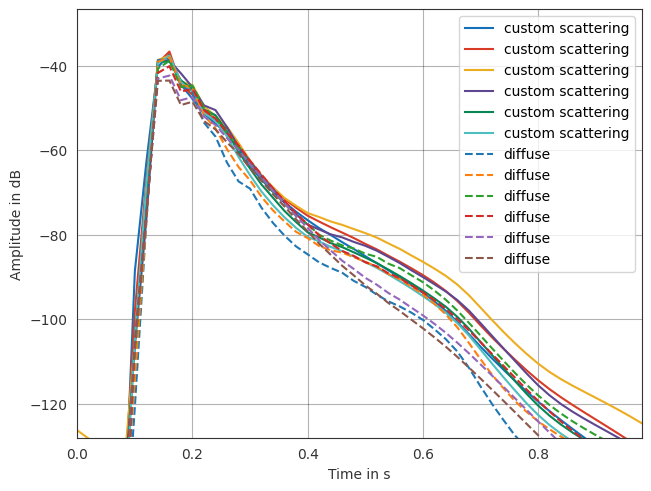

In [ ]:
ax = pf.plot.time(etc_file, dB=True, log_prefix=10,
             label="custom scattering",
             linestyle="-")
ax.set_prop_cycle(None)
pf.plot.time(etc_diff, dB=True, log_prefix=10,
             label="diffuse",
             linestyle="--")
plt.legend()

### run simulation

In [ ]:
assert False

In [ ]:
time_steps = [1/50,1/100,1/250,1/500,1/1000]
patch_sizes = [6,3,2,1.5]
refl_orders = [1,20,40,60,80,100]
angl_res =[2,4,6,8,10]

In [ ]:
# baseline
pss = 3
refll = 10
tss = 1/100
angg = 4

out={"baseline":{"patch_size":[],
                 "reflection_order":[],
                 "time_step":[],
                 "brdf_resolution":[]},
     "reflection_order":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "brdf_resolution":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "patch_size":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "time_step":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
                  }

out["baseline"]["patch_size"]=pss

out["baseline"]["reflection_order"]=refll

out["baseline"]["time_step"]=tss

out["baseline"]["brdf_resolution"]=angg

In [ ]:
# time stepping

for ts in time_steps:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=ts, duration=1.2,
                    refl_order=refll, res=angg)
    out["time_step"]["edc"]=edc.time.tolist()
    out["time_step"]["t"].append(t)
out["time_step"]["data"]=time_steps

with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)


d:\Users\ahe\sparrowpy\examples\run_simu.py:85: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\ita-sim\AppData\Local\miniforge3\envs\sparrowpy\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\ita-sim\AppData\Local\miniforge3\envs\sparrowpy\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
d:\Users\ahe\sparrowpy\examples\run_simu.py:102: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


In [ ]:
# reflection order

for refl in refl_orders:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refl, res=angg)
    out["reflection_order"]["edc"]=edc.time.tolist()
    out["reflection_order"]["t"].append(t)
out["reflection_order"]["data"]=refl_orders

with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)



d:\Users\ahe\sparrowpy\examples\run_simu.py:85: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\ita-sim\AppData\Local\miniforge3\envs\sparrowpy\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\ita-sim\AppData\Local\miniforge3\envs\sparrowpy\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
d:\Users\ahe\sparrowpy\examples\run_simu.py:102: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


KeyboardInterrupt: 

In [ ]:
# angular resolution

for ang in angl_res:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=ang)
    out["brdf_resolution"]["edc"]=edc.time.tolist()
    out["brdf_resolution"]["t"].append(t)
out["brdf_resolution"]["data"]=angl_res

In [ ]:
with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)

In [ ]:
# patch sizes

for pat in patch_sizes:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pat,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=angg )
    out["patch_size"]["edc"] = edc.time.tolist()
    out["patch_size"]["t"].append(t)
out["patch_size"]["data"]=patch_sizes


In [ ]:
with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)

In [ ]:
# memory
for ts in time_steps:
    out["time_step"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=ts, duration=1.2,
                    refl_order=refll, res=angg))
print("ts done")
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)
for refl in refl_orders:
    out["reflection_order"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refl, res=angg))
print("refl done")
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)
for ang in angl_res:
    out["brdf_resolution"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=ang))
print("ang done")
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)


In [ ]:
for pat in patch_sizes:
    out["patch_size"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pat,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=angg))
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)

If the order would be increased, this would match even after 0.5s.


In [ ]:
%load_ext watermark
%watermark -v -m -iv